In [97]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [98]:
df = pd.read_parquet("data.parquet")

In [99]:
print(f"Years in which orders were placed: {df['order_year'].unique()}.")
print(f"Years in which deliveries were made: {df['ship_year'].unique()}.")

Years in which orders were placed: [2016 2015 2014 2017].
Years in which deliveries were made: [2016 2015 2014 2017 2018].


In [100]:
sum_profit = df["profit"].sum()
sum_quantity = df["quantity"].sum()
median_profit = df["profit"].median()
min_profit = df["profit"].min()
max_profit =df["profit"].max()
print(f"Durchschnittlicher Profit pro Transaktion: {sum_profit / len(df)}")
print(f"Durchschnittlicher Profit pro Unit: {sum_profit/ sum_quantity}")
print(f"Median Profit pro Transaktion: {median_profit}")
print(f"Min-Value Profit einer Transaktion: {min_profit}")
print(f"Max-Value Profit einer Transaktion: {max_profit}")

Durchschnittlicher Profit pro Transaktion: 28.65689630778467
Durchschnittlicher Profit pro Unit: 7.562036852111002
Median Profit pro Transaktion: 8.6665
Min-Value Profit einer Transaktion: -6599.978
Max-Value Profit einer Transaktion: 8399.976


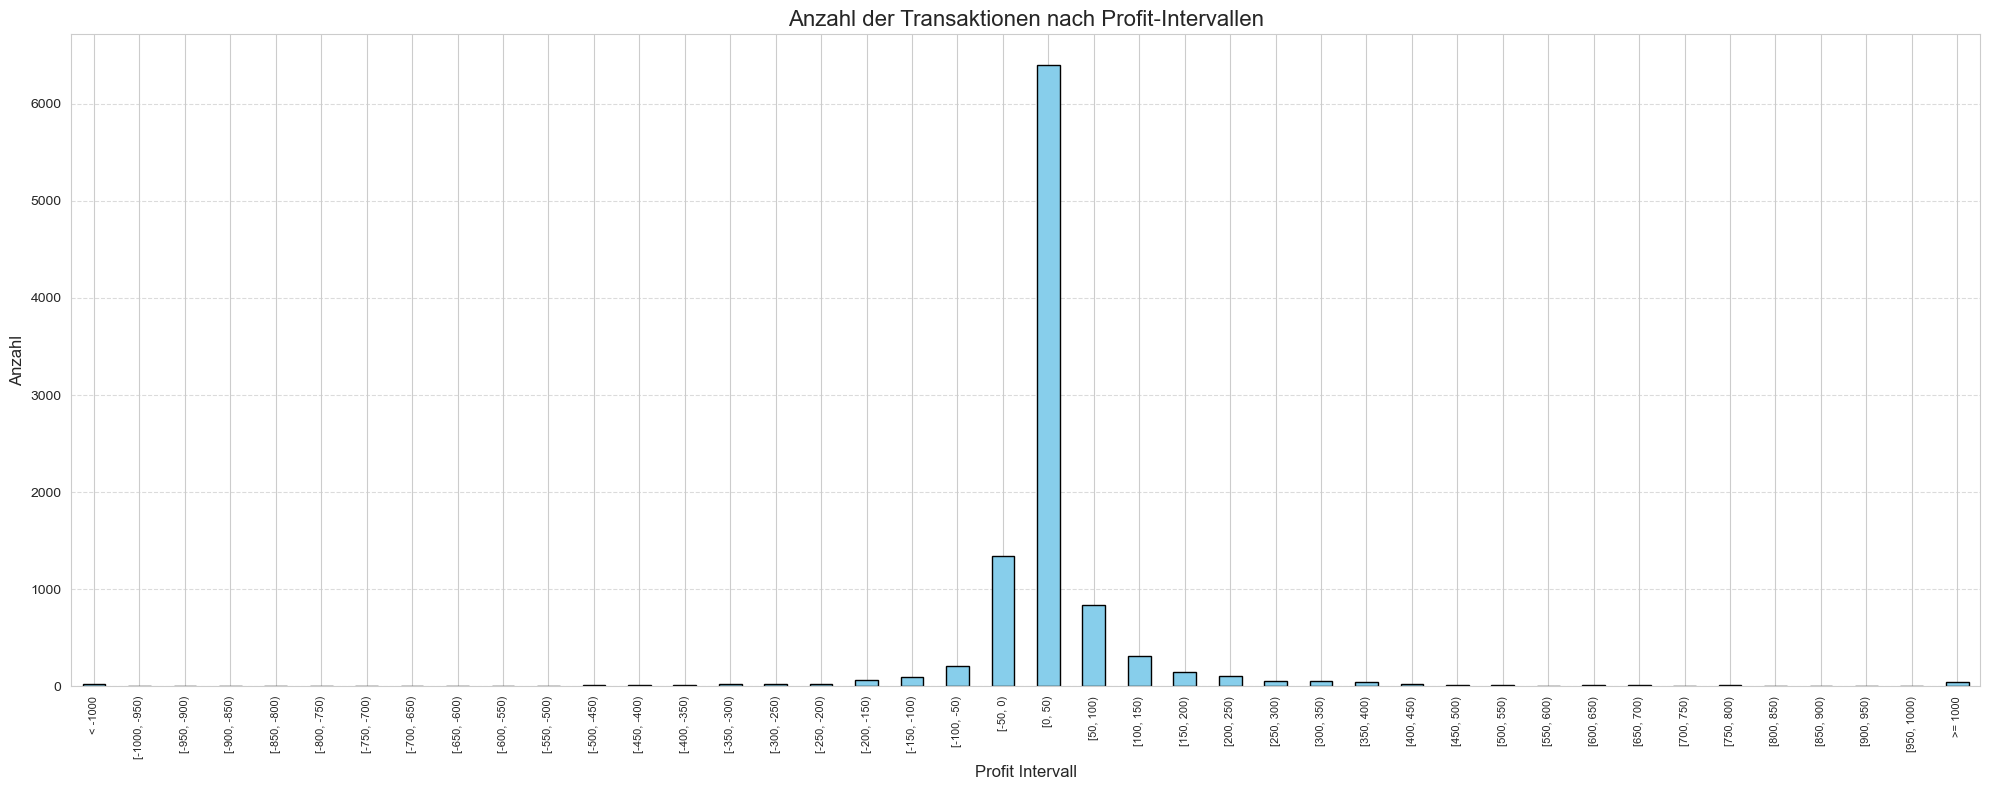

In [101]:
middle_bins = np.arange(-1000, 1001, 50)
bins = np.concatenate(([-np.inf], middle_bins, [np.inf]))

labels = []
labels.append('< -1000')
for i in range(len(middle_bins) - 1):
    labels.append(f'[{middle_bins[i]}, {middle_bins[i+1]})')
labels.append('>= 1000')

df['profit_bin'] = pd.cut(df['profit'], bins=bins, labels=labels, right=False)
bin_counts = df['profit_bin'].value_counts().sort_index()

plt.figure(figsize=(20, 8))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Anzahl der Transaktionen nach Profit-Intervallen', fontsize=16)
plt.xlabel('Profit Intervall', fontsize=12)
plt.ylabel('Anzahl', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

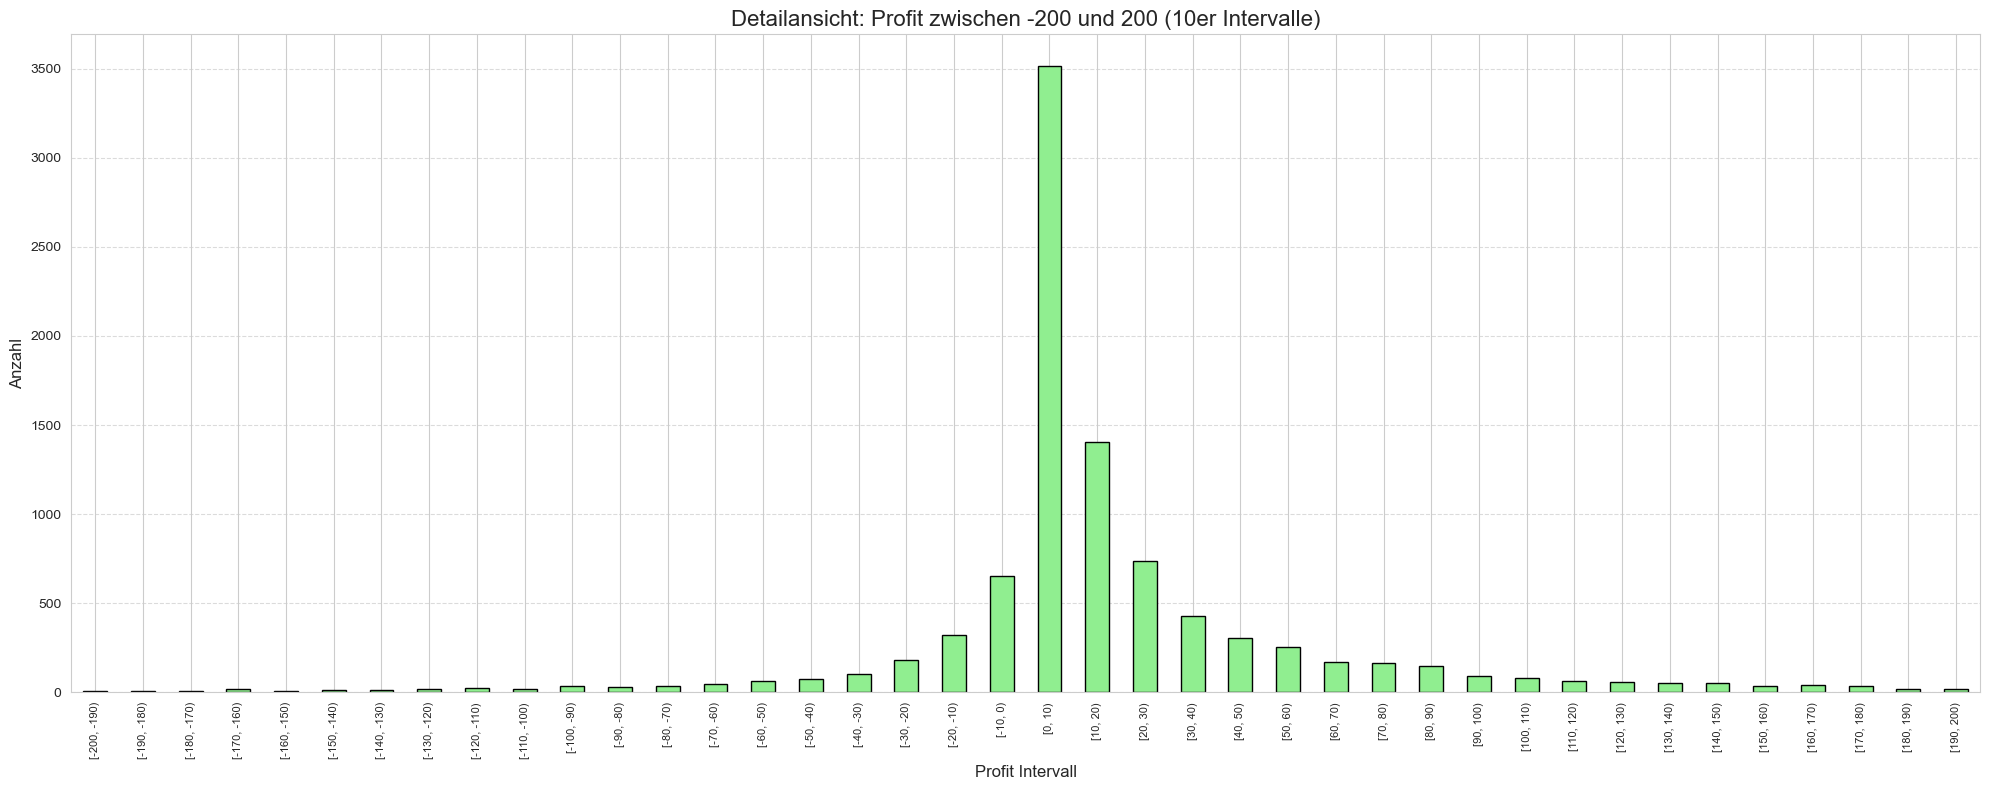

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Daten filtern: Nur Werte zwischen -200 (inklusive) und 200 (exklusive) behalten
mask = (df['profit'] >= -200) & (df['profit'] < 200)
df_zoomed = df.loc[mask].copy()

# 2. Bins definieren: Von -200 bis 200 in 10er Schritten
bins_zoomed = np.arange(-200, 201, 10)

# 3. Labels erstellen
labels_zoomed = []
for i in range(len(bins_zoomed) - 1):
    labels_zoomed.append(f'[{bins_zoomed[i]}, {bins_zoomed[i+1]})')

# 4. Kategorisierung anwenden
df_zoomed['profit_bin_zoomed'] = pd.cut(df_zoomed['profit'], bins=bins_zoomed, labels=labels_zoomed, right=False)

# 5. Zählen
bin_counts_zoomed = df_zoomed['profit_bin_zoomed'].value_counts().sort_index()

# 6. Plotten
plt.figure(figsize=(20, 8))
bin_counts_zoomed.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Detailansicht: Profit zwischen -200 und 200 (10er Intervalle)', fontsize=16)
plt.xlabel('Profit Intervall', fontsize=12)
plt.ylabel('Anzahl', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

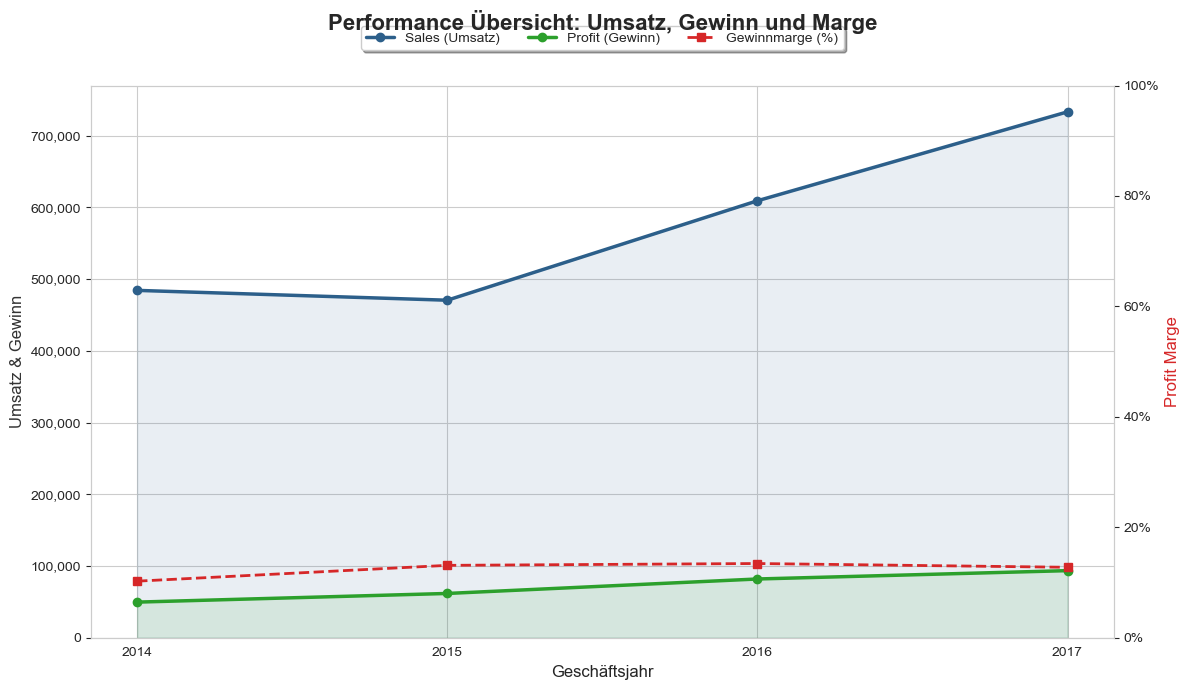

In [103]:
sns.set_style("whitegrid")
# Daten aggregieren und Marge berechnen
yearly_stats = df.groupby('order_year')[['sales', 'profit']].sum()
yearly_stats['margin'] = yearly_stats['profit'] / yearly_stats['sales']

# Plot Setup
fig, ax1 = plt.subplots(figsize=(12, 7))

# Farben
color_sales = '#2c5f8a'
color_profit = '#2ca02c'
color_margin = '#d62728'

# LINKE ACHSE (Sales & Profit)
ax1.set_xlabel('Geschäftsjahr', fontsize=12)
ax1.set_ylabel('Umsatz & Gewinn', color='#333333', fontsize=12)

# Sales & Profit Linien mit Füllung
ax1.plot(yearly_stats.index, yearly_stats['sales'], color=color_sales, 
         marker='o', linewidth=2.5, label='Sales (Umsatz)')
ax1.fill_between(yearly_stats.index, yearly_stats['sales'], color=color_sales, alpha=0.1)

ax1.plot(yearly_stats.index, yearly_stats['profit'], color=color_profit, 
         marker='o', linewidth=2.5, label='Profit (Gewinn)')
ax1.fill_between(yearly_stats.index, yearly_stats['profit'], color=color_profit, alpha=0.1)

# Formatierung: Tausender-Trennzeichen und Start bei 0
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax1.set_ylim(bottom=0)

# RECHTE ACHSE (Marge) + LINIE
ax2 = ax1.twinx()
ax2.set_ylabel('Profit Marge', color=color_margin, fontsize=12)
ax2.plot(yearly_stats.index, yearly_stats['margin'], color=color_margin, 
         marker='s', linestyle='--', linewidth=2, label='Gewinnmarge (%)')
ax2.set_ylim(0, 1)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax2.grid(False)

# LEGENDE & TITEL
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(lines_1 + lines_2, labels_1 + labels_2, 
           loc='upper center', bbox_to_anchor=(0.5, 1.12), 
           ncol=3, frameon=True, shadow=True)

plt.title('Performance Übersicht: Umsatz, Gewinn und Marge', fontsize=16, fontweight='bold', pad=40)
plt.tight_layout()
plt.show()

## Diagramme

In [104]:
def draw_styled_plot(ax, x_data, y_data, label, title="", ylabel="", 
                     linestyle='-', color=None, is_percent=False):
    
    ax.plot(x_data, y_data, 
            marker='o', 
            linewidth=2.5, 
            linestyle=linestyle, 
            label=label,
            color=color)
    
    if title:
        ax.set_title(title, fontweight='bold')
    if ylabel:
        ax.set_ylabel(ylabel)
        
    ax.grid(True, linestyle='--', alpha=0.7)
    
    if label:
        ax.legend(loc='upper left', fontsize='small')

    if is_percent:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        for x, y in zip(x_data, y_data):
            if pd.notnull(y):
                ax.text(x, y, 
                        f"{y:.1f}%", 
                        fontsize=9, ha='center', va='bottom', 
                        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=0.5))

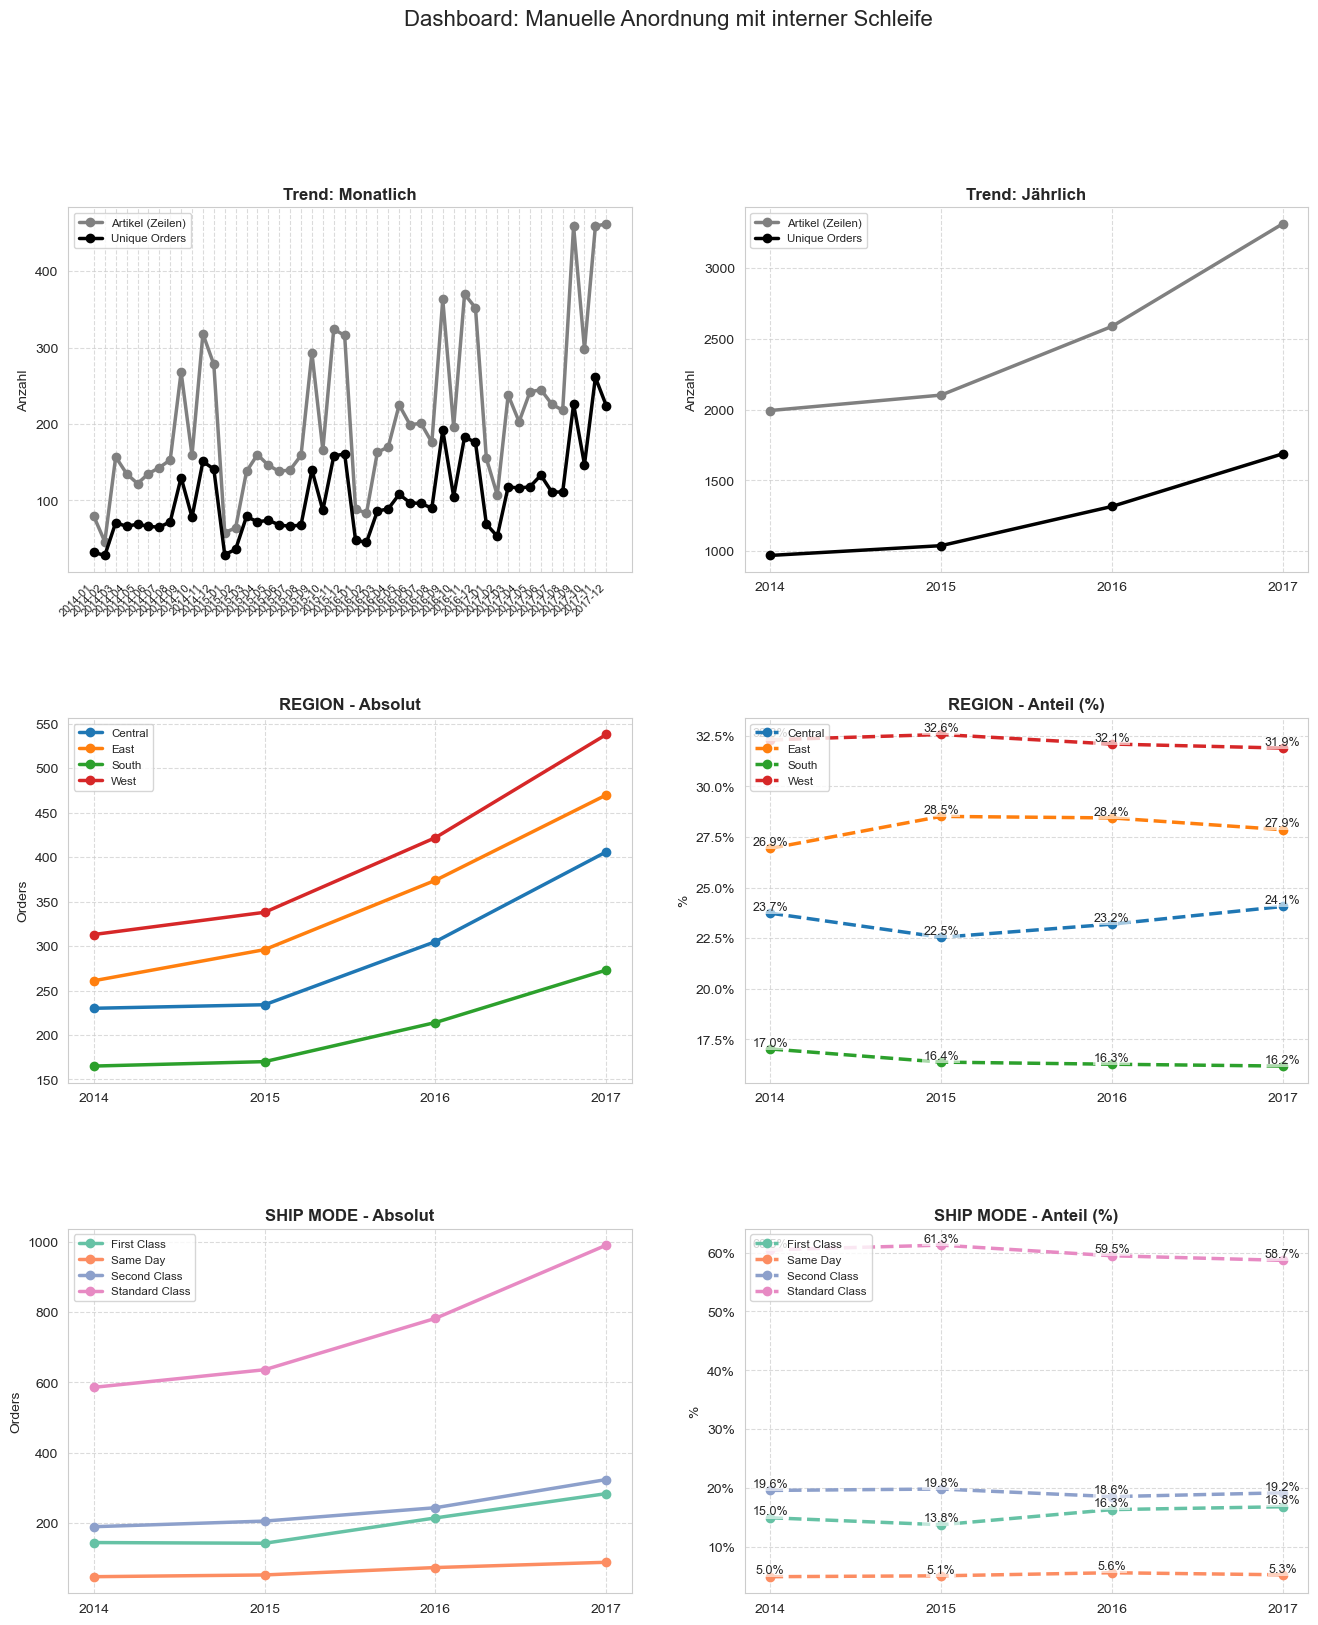

In [105]:

df2 = df.copy(deep=True)
# ---------------------------------------------------------
# 2. DATEN VORBEREITUNG (Global)
# ---------------------------------------------------------

# Datum formatieren
df2['order_date'] = pd.to_datetime(df['order_date'])
df2['order_month'] = df['order_date'].dt.to_period('M').astype(str)

# Listen für die X-Achsen
years = sorted(df2['order_year'].unique())
months = sorted(df2['order_month'].unique())

# Daten für Zeile 1 (Allgemeiner Überblick)
stats_monthly = df2.groupby('order_month').agg(rows=('order_id', 'count'), orders=('order_id', 'nunique')).reset_index()
stats_yearly = df2.groupby('order_year').agg(rows=('order_id', 'count'), orders=('order_id', 'nunique')).reset_index()

# Gesamtsummen pro Jahr für die Prozentrechnung der Kategorien
yearly_totals = df2.groupby('order_year')['order_id'].nunique()


# ---------------------------------------------------------
# 3. PLOTTING SETUP
# ---------------------------------------------------------
# Wir definieren explizit 3 Zeilen:
# Zeile 0: Allgemein (Monatlich & Jährlich)
# Zeile 1: Region (Absolut & Relativ)
# Zeile 2: Ship Mode (Absolut & Relativ)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.2) # Abstände anpassen

fig.suptitle('Dashboard: Manuelle Anordnung mit interner Schleife', fontsize=16, y=0.99)


# =============================================================================
# BLOCK 1: ALLGEMEINE ENTWICKLUNG (Zeile 0)
# =============================================================================

# --- Oben Links: Monatliche Entwicklung (Detail) ---
ax_month = axes[0, 0]

# Hier brauchen wir keine Schleife, es sind nur 2 spezifische Linien
draw_styled_plot(ax=ax_month, x_data=stats_monthly['order_month'], y_data=stats_monthly['rows'],
                 label='Artikel (Zeilen)', title='Trend: Monatlich', ylabel='Anzahl', color='grey')

draw_styled_plot(ax=ax_month, x_data=stats_monthly['order_month'], y_data=stats_monthly['orders'],
                 label='Unique Orders', color='black')

# X-Achse formatieren (Monate rotieren)
ax_month.set_xticks(range(len(months)))
ax_month.set_xticklabels(months, rotation=45, ha='right', fontsize=8)


# --- Oben Rechts: Jährliche Entwicklung (Überblick) ---
ax_year = axes[0, 1]

draw_styled_plot(ax=ax_year, x_data=stats_yearly['order_year'], y_data=stats_yearly['rows'],
                 label='Artikel (Zeilen)', title='Trend: Jährlich', ylabel='Anzahl', color='grey')

draw_styled_plot(ax=ax_year, x_data=stats_yearly['order_year'], y_data=stats_yearly['orders'],
                 label='Unique Orders', color='black')

ax_year.set_xticks(years)


# =============================================================================
# BLOCK 2: REGION (Zeile 1)
# =============================================================================

# 1. Daten berechnen für Region
df_reg = df2.groupby(['order_year', 'region'])['order_id'].nunique().reset_index()
df_reg = df_reg.merge(yearly_totals.rename('total'), on='order_year')
df_reg['pct'] = (df_reg['order_id'] / df_reg['total']) * 100

# 2. Setup für Region-Plots
ax_reg_abs = axes[1, 0]
ax_reg_rel = axes[1, 1]
unique_regions = df_reg['region'].unique()
colors_reg = sns.color_palette("tab10", len(unique_regions)) # Farben generieren

# 3. Interne Schleife (Nur für Region!)
for i, region in enumerate(unique_regions):
    subset = df_reg[df_reg['region'] == region]
    c = colors_reg[i]
    
    # Links: Absolut
    draw_styled_plot(ax=ax_reg_abs, x_data=subset['order_year'], y_data=subset['order_id'],
                     label=region, title='REGION - Absolut', ylabel='Orders', color=c)
    
    # Rechts: Relativ
    draw_styled_plot(ax=ax_reg_rel, x_data=subset['order_year'], y_data=subset['pct'],
                     label=region, title='REGION - Anteil (%)', ylabel='%', 
                     linestyle='--', color=c, is_percent=True)

# Achsen setzen
ax_reg_abs.set_xticks(years)
ax_reg_rel.set_xticks(years)


# =============================================================================
# BLOCK 3: SHIP MODE (Zeile 2)
# =============================================================================

# 1. Daten berechnen für Ship Mode
df_ship = df.groupby(['order_year', 'ship_mode'])['order_id'].nunique().reset_index()
df_ship = df_ship.merge(yearly_totals.rename('total'), on='order_year')
df_ship['pct'] = (df_ship['order_id'] / df_ship['total']) * 100

# 2. Setup für Ship-Plots
ax_ship_abs = axes[2, 0]
ax_ship_rel = axes[2, 1]
unique_modes = df_ship['ship_mode'].unique()
colors_ship = sns.color_palette("Set2", len(unique_modes)) # Andere Farbpalette zur Unterscheidung

# 3. Interne Schleife (Nur für Ship Mode!)
for i, mode in enumerate(unique_modes):
    subset = df_ship[df_ship['ship_mode'] == mode]
    c = colors_ship[i]
    
    # Links: Absolut
    draw_styled_plot(ax=ax_ship_abs, x_data=subset['order_year'], y_data=subset['order_id'],
                     label=mode, title='SHIP MODE - Absolut', ylabel='Orders', color=c)
    
    # Rechts: Relativ
    draw_styled_plot(ax=ax_ship_rel, x_data=subset['order_year'], y_data=subset['pct'],
                     label=mode, title='SHIP MODE - Anteil (%)', ylabel='%', 
                     linestyle='--', color=c, is_percent=True)

# Achsen setzen
ax_ship_abs.set_xticks(years)
ax_ship_rel.set_xticks(years)


# ---------------------------------------------------------
# FINALISIERUNG
# ---------------------------------------------------------
plt.show()

C:\Users\U773897\AppData\Local\Temp\ipykernel_14248\1859060737.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
C:\Users\U773897\AppData\Local\Temp\ipykernel_14248\1859060737.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
C:\Users\U773897\AppData\Local\Temp\ipykernel_14248\1859060737.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
C:\Users\U773897\AppData\Local\Temp\ipykernel_14248\1859060737.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])


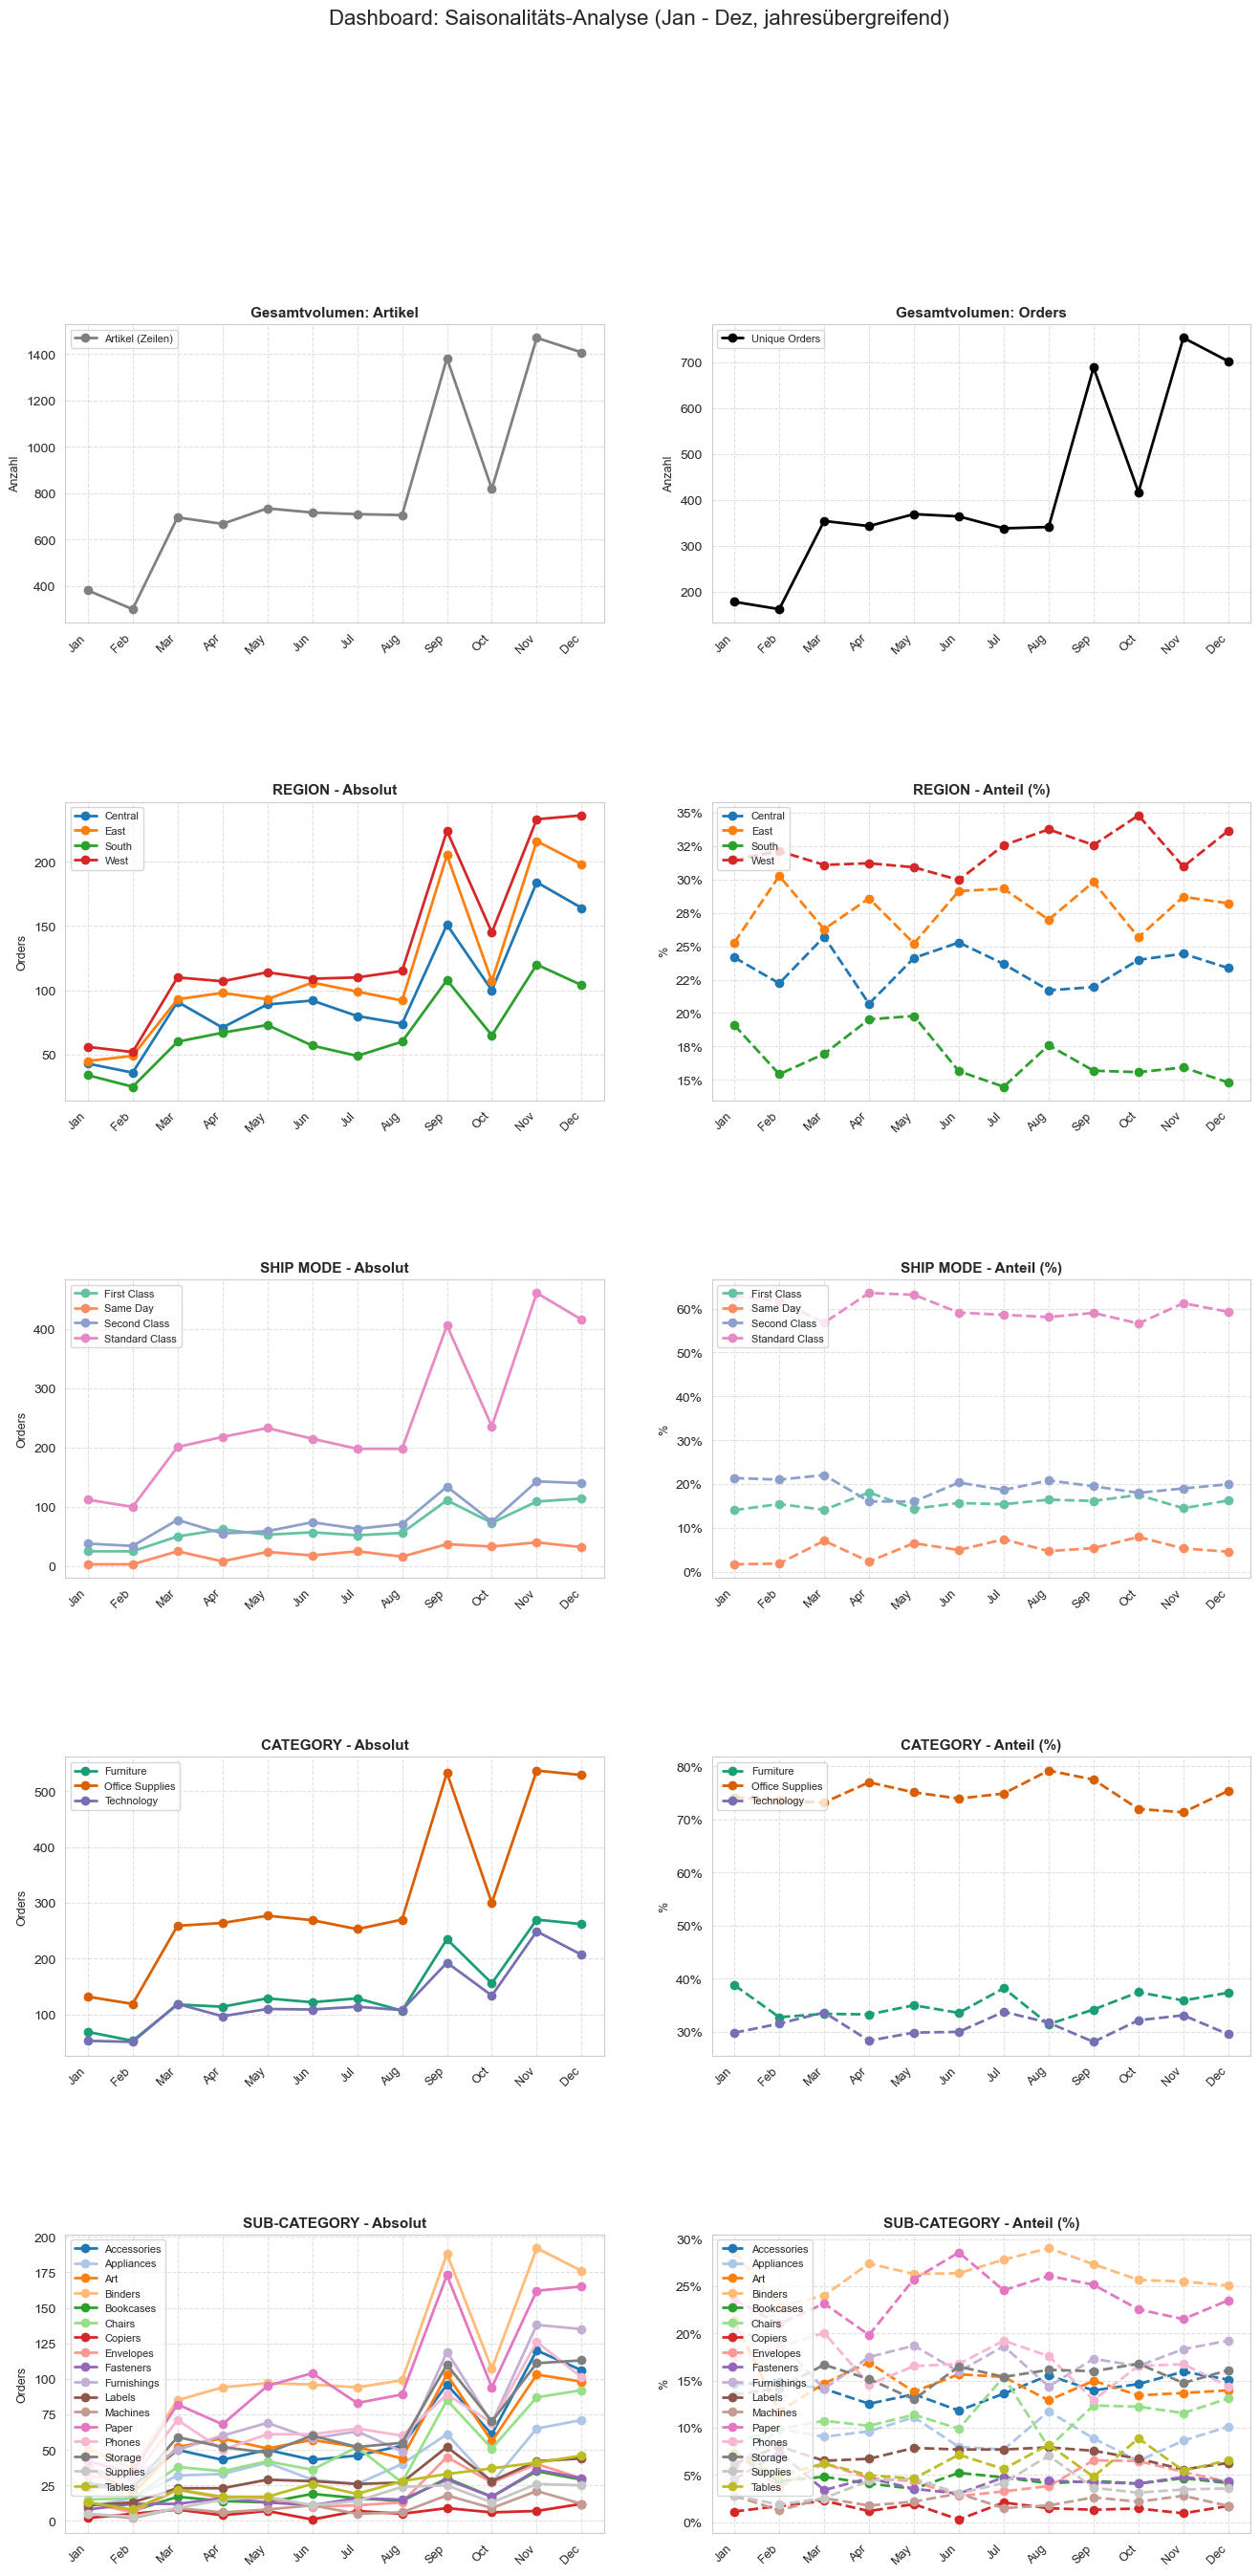

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Styles
sns.set_style("whitegrid")

# ---------------------------------------------------------
# 0. HILFSFUNKTION (Plotting)
# ---------------------------------------------------------
def draw_styled_plot(ax, x_data, y_data, label, title, ylabel, color, linestyle='-', is_percent=False):
    """
    Zeichnet eine Linie auf eine gegebene Achse (ax) mit einheitlichem Styling.
    """
    ax.plot(x_data, y_data, marker='o', linestyle=linestyle, linewidth=2, label=label, color=color)
    
    # Titel und Labels
    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=9)
    
    # Grid
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Legende (nur hinzufügen, wenn noch nicht voll)
    if ax.get_legend() is None:
        ax.legend(loc='upper left', fontsize=8, frameon=True)
    else:
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc='upper left', fontsize=8, frameon=True)

    # Prozent-Formatierung Y-Achse
    if is_percent:
        vals = ax.get_yticks()
        ax.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])

# Funktion um X-Achsen einheitlich zu formatieren (1-12 -> Jan-Dec)
def format_seasonal_xaxis(ax):
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(month_names, rotation=45, ha='right', fontsize=9)
    ax.set_xlim(0.5, 12.5)

# ---------------------------------------------------------
# 1. DATEN VORBEREITUNG
# ---------------------------------------------------------
df2 = df.copy(deep=True)

# Datum formatieren & Monat als Zahl (1-12) extrahieren
df2['order_date'] = pd.to_datetime(df['order_date'])
df2['month_int'] = df2['order_date'].dt.month 

# GLOBALER NENNER: Wie viele Orders gab es pro Monat (über alle Jahre summiert)?
# Das ist die Basis für alle Prozentrechnungen ("Marktanteil im Monat")
monthly_totals_seasonal = df2.groupby('month_int')['order_id'].nunique()


# ---------------------------------------------------------
# 2. PLOTTING SETUP
# ---------------------------------------------------------
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 30))
plt.subplots_adjust(hspace=0.6, wspace=0.2)

fig.suptitle('Dashboard: Saisonalitäts-Analyse (Jan - Dez, jahresübergreifend)', fontsize=16, y=0.99)


# =============================================================================
# BLOCK 1: ALLGEMEINER ÜBERBLICK (Zeile 0)
# =============================================================================
# Daten aggregieren
stats_seasonal = df2.groupby('month_int').agg(
    rows=('order_id', 'count'), 
    orders=('order_id', 'nunique')
).reset_index()

ax_gen_rows = axes[0, 0]
ax_gen_orders = axes[0, 1]

# Links: Verkaufte Artikel (Zeilen)
draw_styled_plot(ax=ax_gen_rows, x_data=stats_seasonal['month_int'], y_data=stats_seasonal['rows'],
                 label='Artikel (Zeilen)', title='Gesamtvolumen: Artikel', ylabel='Anzahl', color='grey')

# Rechts: Unique Orders
draw_styled_plot(ax=ax_gen_orders, x_data=stats_seasonal['month_int'], y_data=stats_seasonal['orders'],
                 label='Unique Orders', title='Gesamtvolumen: Orders', ylabel='Anzahl', color='black')

format_seasonal_xaxis(ax_gen_rows)
format_seasonal_xaxis(ax_gen_orders)


# =============================================================================
# BLOCK 2: REGION (Zeile 1)
# =============================================================================
# Gruppieren nach Monat & Region
df_reg = df2.groupby(['month_int', 'region'])['order_id'].nunique().reset_index()
# Merge mit monatlichen Totals für Prozentanteil
df_reg = df_reg.merge(monthly_totals_seasonal.rename('total'), on='month_int')
df_reg['pct'] = (df_reg['order_id'] / df_reg['total']) * 100

ax_reg_abs = axes[1, 0]
ax_reg_rel = axes[1, 1]
unique_regions = df_reg['region'].unique()
colors_reg = sns.color_palette("tab10", len(unique_regions))

for i, region in enumerate(unique_regions):
    subset = df_reg[df_reg['region'] == region]
    c = colors_reg[i]
    draw_styled_plot(ax=ax_reg_abs, x_data=subset['month_int'], y_data=subset['order_id'],
                     label=region, title='REGION - Absolut', ylabel='Orders', color=c)
    draw_styled_plot(ax=ax_reg_rel, x_data=subset['month_int'], y_data=subset['pct'],
                     label=region, title='REGION - Anteil (%)', ylabel='%', linestyle='--', color=c, is_percent=True)

format_seasonal_xaxis(ax_reg_abs)
format_seasonal_xaxis(ax_reg_rel)


# =============================================================================
# BLOCK 3: SHIP MODE (Zeile 2)
# =============================================================================
df_ship = df2.groupby(['month_int', 'ship_mode'])['order_id'].nunique().reset_index()
df_ship = df_ship.merge(monthly_totals_seasonal.rename('total'), on='month_int')
df_ship['pct'] = (df_ship['order_id'] / df_ship['total']) * 100

ax_ship_abs = axes[2, 0]
ax_ship_rel = axes[2, 1]
unique_modes = df_ship['ship_mode'].unique()
colors_ship = sns.color_palette("Set2", len(unique_modes))

for i, mode in enumerate(unique_modes):
    subset = df_ship[df_ship['ship_mode'] == mode]
    c = colors_ship[i]
    draw_styled_plot(ax=ax_ship_abs, x_data=subset['month_int'], y_data=subset['order_id'],
                     label=mode, title='SHIP MODE - Absolut', ylabel='Orders', color=c)
    draw_styled_plot(ax=ax_ship_rel, x_data=subset['month_int'], y_data=subset['pct'],
                     label=mode, title='SHIP MODE - Anteil (%)', ylabel='%', linestyle='--', color=c, is_percent=True)

format_seasonal_xaxis(ax_ship_abs)
format_seasonal_xaxis(ax_ship_rel)


# =============================================================================
# BLOCK 4: CATEGORY (Zeile 3)
# =============================================================================
df_cat = df2.groupby(['month_int', 'category'])['order_id'].nunique().reset_index()
df_cat = df_cat.merge(monthly_totals_seasonal.rename('total'), on='month_int')
df_cat['pct'] = (df_cat['order_id'] / df_cat['total']) * 100

ax_cat_abs = axes[3, 0]
ax_cat_rel = axes[3, 1]
unique_cats = df_cat['category'].unique()
colors_cat = sns.color_palette("Dark2", len(unique_cats))

for i, cat in enumerate(unique_cats):
    subset = df_cat[df_cat['category'] == cat]
    c = colors_cat[i]
    draw_styled_plot(ax=ax_cat_abs, x_data=subset['month_int'], y_data=subset['order_id'],
                     label=cat, title='CATEGORY - Absolut', ylabel='Orders', color=c)
    draw_styled_plot(ax=ax_cat_rel, x_data=subset['month_int'], y_data=subset['pct'],
                     label=cat, title='CATEGORY - Anteil (%)', ylabel='%', linestyle='--', color=c, is_percent=True)

format_seasonal_xaxis(ax_cat_abs)
format_seasonal_xaxis(ax_cat_rel)


# =============================================================================
# BLOCK 5: SUB-CATEGORY (Zeile 4)
# =============================================================================
df_sub = df2.groupby(['month_int', 'sub_category'])['order_id'].nunique().reset_index()
df_sub = df_sub.merge(monthly_totals_seasonal.rename('total'), on='month_int')
df_sub['pct'] = (df_sub['order_id'] / df_sub['total']) * 100

ax_sub_abs = axes[4, 0]
ax_sub_rel = axes[4, 1]
unique_subs = df_sub['sub_category'].unique()
colors_sub = sns.color_palette("tab20", len(unique_subs)) 

for i, sub in enumerate(unique_subs):
    subset = df_sub[df_sub['sub_category'] == sub]
    c = colors_sub[i]
    draw_styled_plot(ax=ax_sub_abs, x_data=subset['month_int'], y_data=subset['order_id'],
                     label=sub, title='SUB-CATEGORY - Absolut', ylabel='Orders', color=c)
    draw_styled_plot(ax=ax_sub_rel, x_data=subset['month_int'], y_data=subset['pct'],
                     label=sub, title='SUB-CATEGORY - Anteil (%)', ylabel='%', linestyle='--', color=c, is_percent=True)

format_seasonal_xaxis(ax_sub_abs)
format_seasonal_xaxis(ax_sub_rel)

# ---------------------------------------------------------
# FINALISIERUNG
# ---------------------------------------------------------
plt.show()

## Boxplots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def gen_plot(
        df_values, 
        df_devide_values=None, 
        title="Platzhalter Titel", 
        xlabel="Platzhalter xlabel", 
        ylabel="Platzhalter ylabel", 
        figsize=(10, 8),
        ax=None
        ):
    
    # Berechnung der Werte
    if df_devide_values is not None:
        values = df_values / df_devide_values
    else:
        values = df_values

    # Wenn keine Achse übergeben wurde, erstelle eine neue Figur (Standalone Modus)
    if ax is None:
        plt.figure(figsize=figsize)
        ax = plt.gca()

    # Heatmap auf der spezifischen Achse 'ax' zeichnen
    sns.heatmap(values, 
                annot=True, 
                fmt=".2f",       
                cmap="RdYlGn",   
                center=0,       
                linewidths=.5,
                cbar_kws={'label': 'Durchschnittsgewinn'},
                ax=ax)

    # Titel und Label auf die Achse setzen (Syntax ändert sich leicht von plt. zu ax.set_)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', labeltop=True, labelbottom=False)

    # plt.show() und tight_layout nur ausführen, wenn wir im Standalone Modus sind
    # (Sonst macht das der äußere Code, der die Subplots erstellt)
    if ax is None: 
        plt.tight_layout()
        plt.show()

print("Plot function updated.")

Plot function updated.


In [ ]:
## SUB CATEGORY / REGION
df_profit_sum_sub_category_region = df.pivot_table(index='sub_category', columns='region', values='profit', aggfunc='sum')
df_quantity_sum_sub_category_region = df.pivot_table(index='sub_category', columns='region', values='quantity', aggfunc='sum')
## CATEGORY / REGION
df_profit_sum_category_region = df.pivot_table(index='category', columns='region', values='profit', aggfunc='sum')
df_quantity_sum_category_region = df.pivot_table(index='category', columns='region', values='quantity', aggfunc='sum')
## REGION / SEGMENT
df_profit_sum_segment_region = df.pivot_table(index='segment', columns='region', values='profit', aggfunc='sum')
df_quantity_sum_segment_region = df.pivot_table(index='segment', columns='region', values='quantity', aggfunc='sum')
## SUB CATEGORY / SEGMENT
df_profit_sum_sub_category_segment = df.pivot_table(index='sub_category', columns='segment', values='profit', aggfunc='sum')
df_quantity_sum_sub_category_segment = df.pivot_table(index='sub_category', columns='segment', values='quantity', aggfunc='sum')
## DISCOUNT / SEGMENT
df_profit_sum_discount_segment = df.pivot_table(index='discount', columns='segment', values='profit', aggfunc='sum')
df_quantity_sum_discount_segment = df.pivot_table(index='discount', columns='segment', values='quantity', aggfunc='sum')
## DISCOUNT / SEGMENT
df_profit_sum_sub_category_month = df.pivot_table(index='sub_category', columns='order_month', values='profit', aggfunc='sum')
df_quantity_sum_sub_category_month = df.pivot_table(index='sub_category', columns='order_month', values='quantity', aggfunc='sum')
## SUB CATEGORY / MONTH
df_profit_sum_category_month = df.pivot_table(index='category', columns='order_month', values='profit', aggfunc='sum')
df_quantity_sum_category_month = df.pivot_table(index='category', columns='order_month', values='quantity', aggfunc='sum')

print("Necessary pivot tables generated.")

Necessary pivot tables generated.


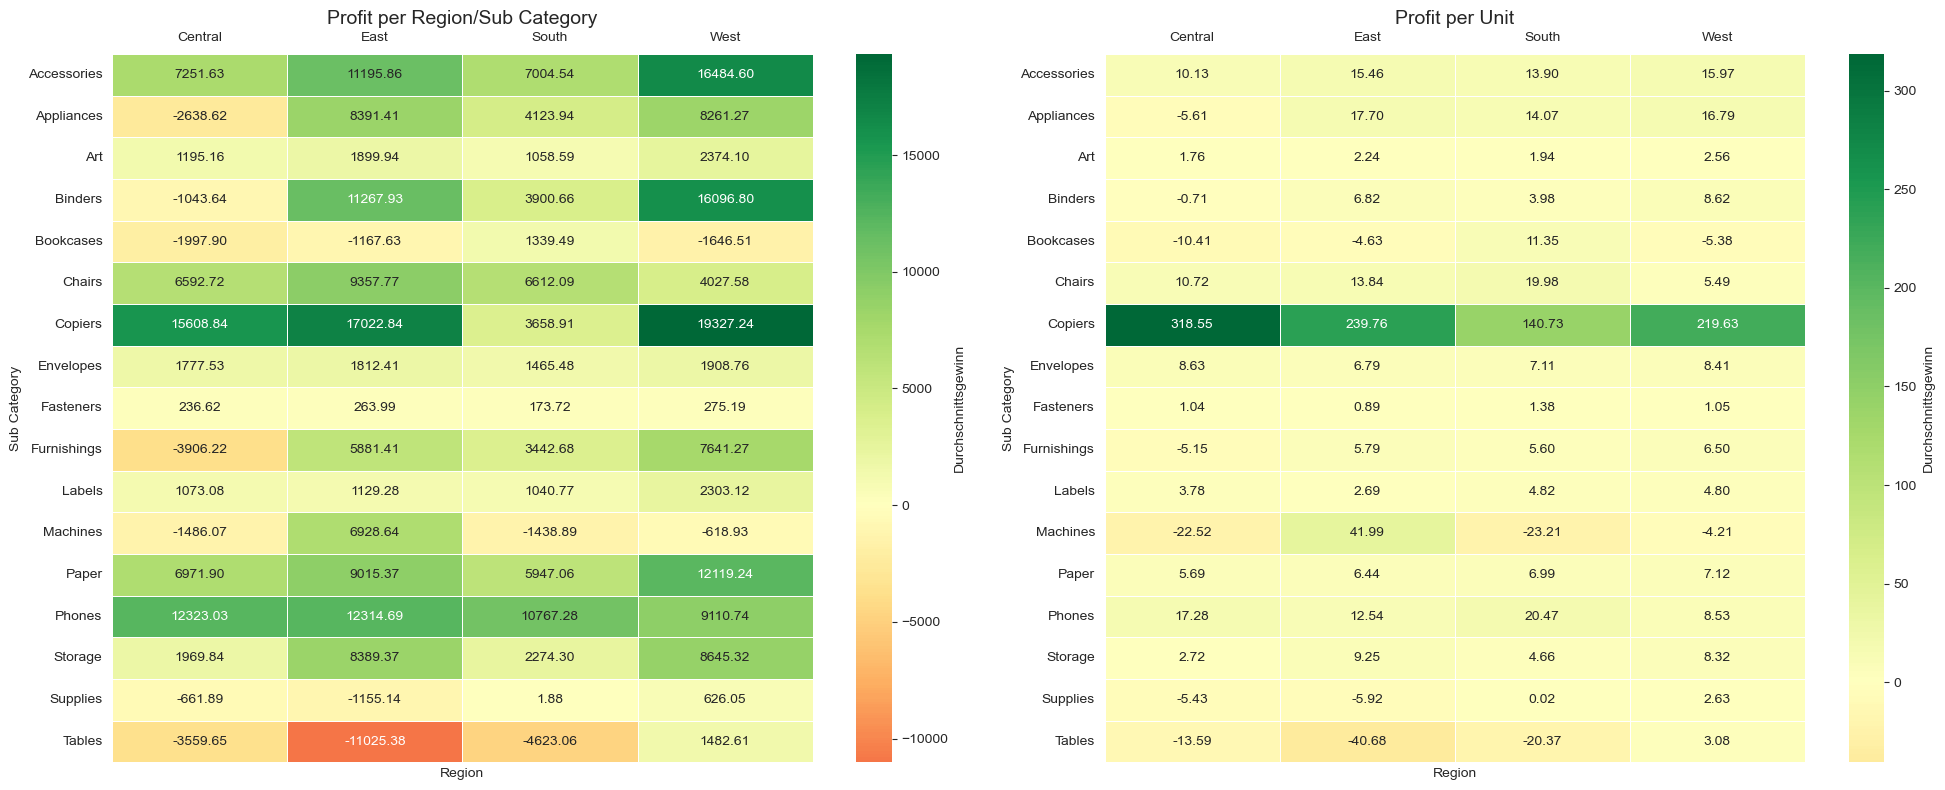

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8)) 

gen_plot(
    df_profit_sum_sub_category_region, 
    None, 
    "Profit per Region/Sub Category", 
    "Region", 
    "Sub Category", 
    ax=ax1
)

gen_plot(
    df_profit_sum_sub_category_region, 
    df_quantity_sum_sub_category_region, 
    "Profit per Unit", 
    "Region", 
    "Sub Category", 
    ax=ax2
)

plt.tight_layout()
plt.show()

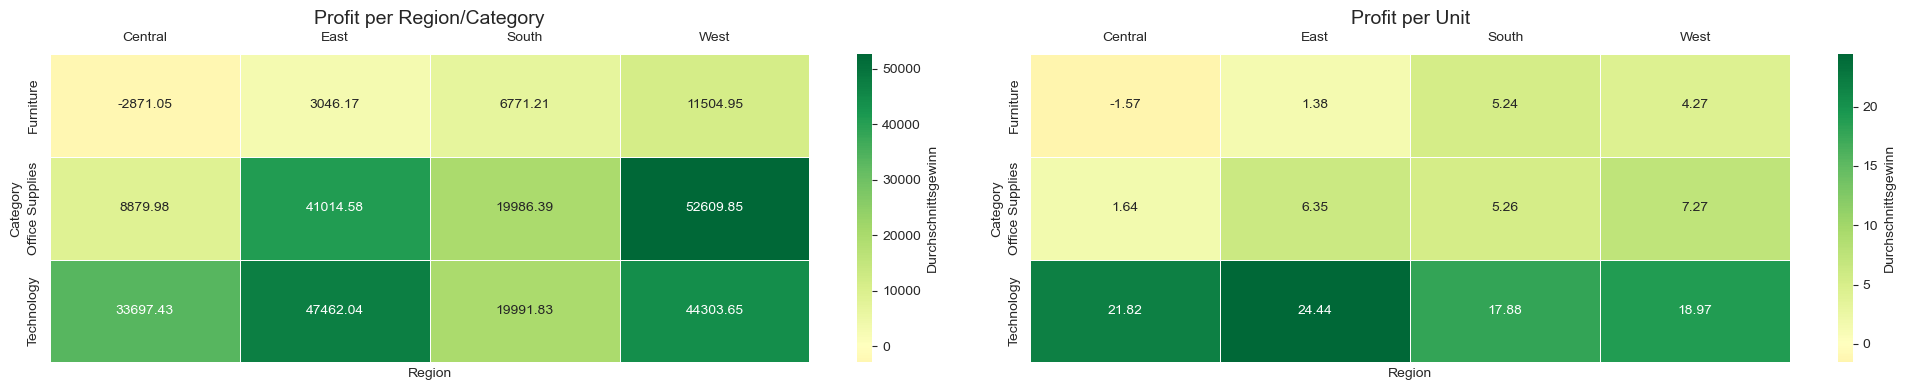

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4)) 
gen_plot(
    df_profit_sum_category_region, 
    None, 
    "Profit per Region/Category", 
    "Region", 
    "Category", 
    ax=ax1
)
gen_plot(
    df_profit_sum_category_region, 
    df_quantity_sum_category_region, 
    "Profit per Unit", 
    "Region", 
    "Category", 
    ax=ax2
)
plt.tight_layout()
plt.show()

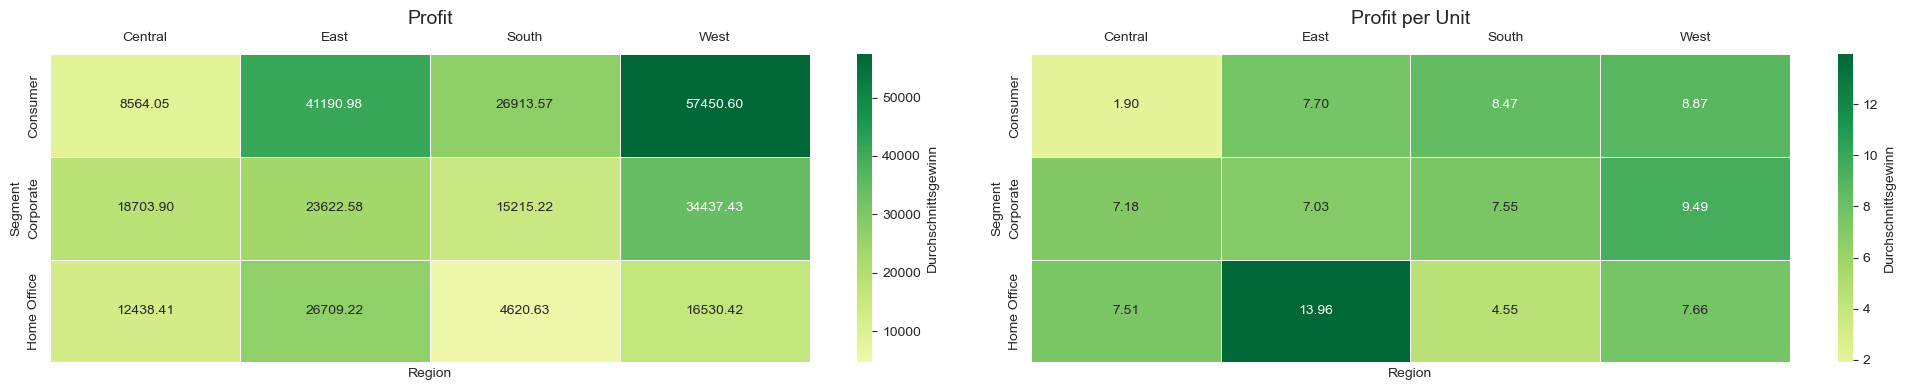

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4)) 
gen_plot(
    df_profit_sum_segment_region, 
    None, 
    "Profit", 
    "Region", 
    "Segment", 
    ax=ax1
)
gen_plot(
    df_profit_sum_segment_region, 
    df_quantity_sum_segment_region, 
    "Profit per Unit", 
    "Region", 
    "Segment", 
    ax=ax2
)
plt.tight_layout()
plt.show()

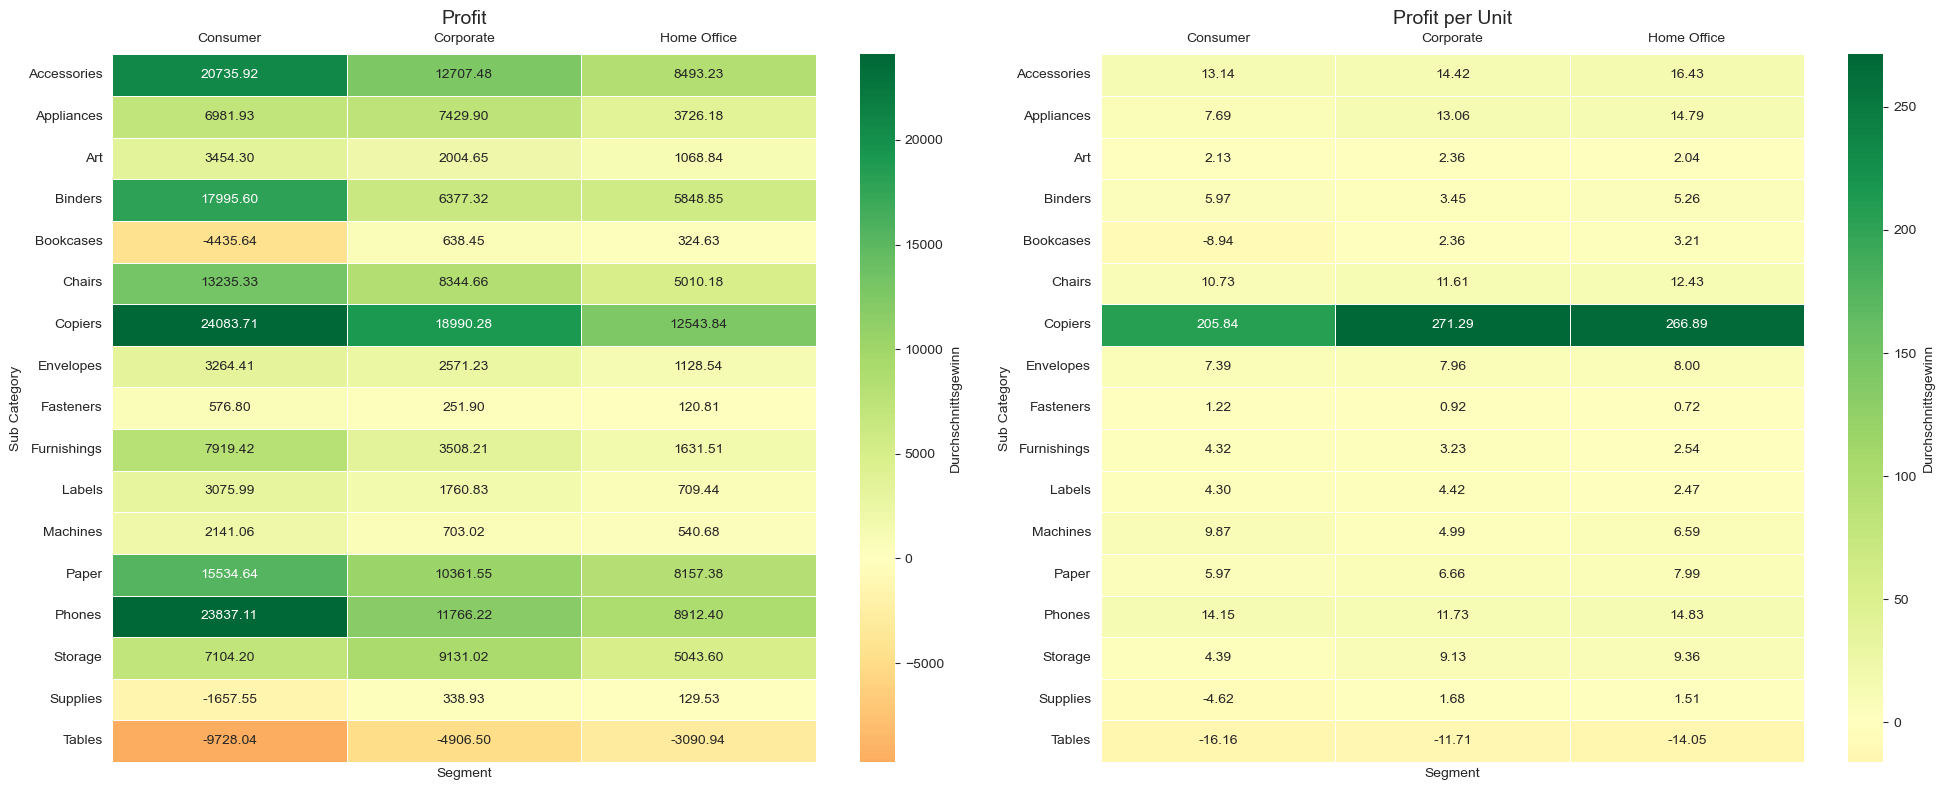

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8)) 
gen_plot(
    df_profit_sum_sub_category_segment, 
    None, 
    "Profit", 
    "Segment", 
    "Sub Category", 
    ax=ax1 
)
gen_plot(
    df_profit_sum_sub_category_segment, 
    df_quantity_sum_sub_category_segment, 
    "Profit per Unit", 
    "Segment", 
    "Sub Category", 
    ax=ax2 
)
plt.tight_layout()
plt.show()

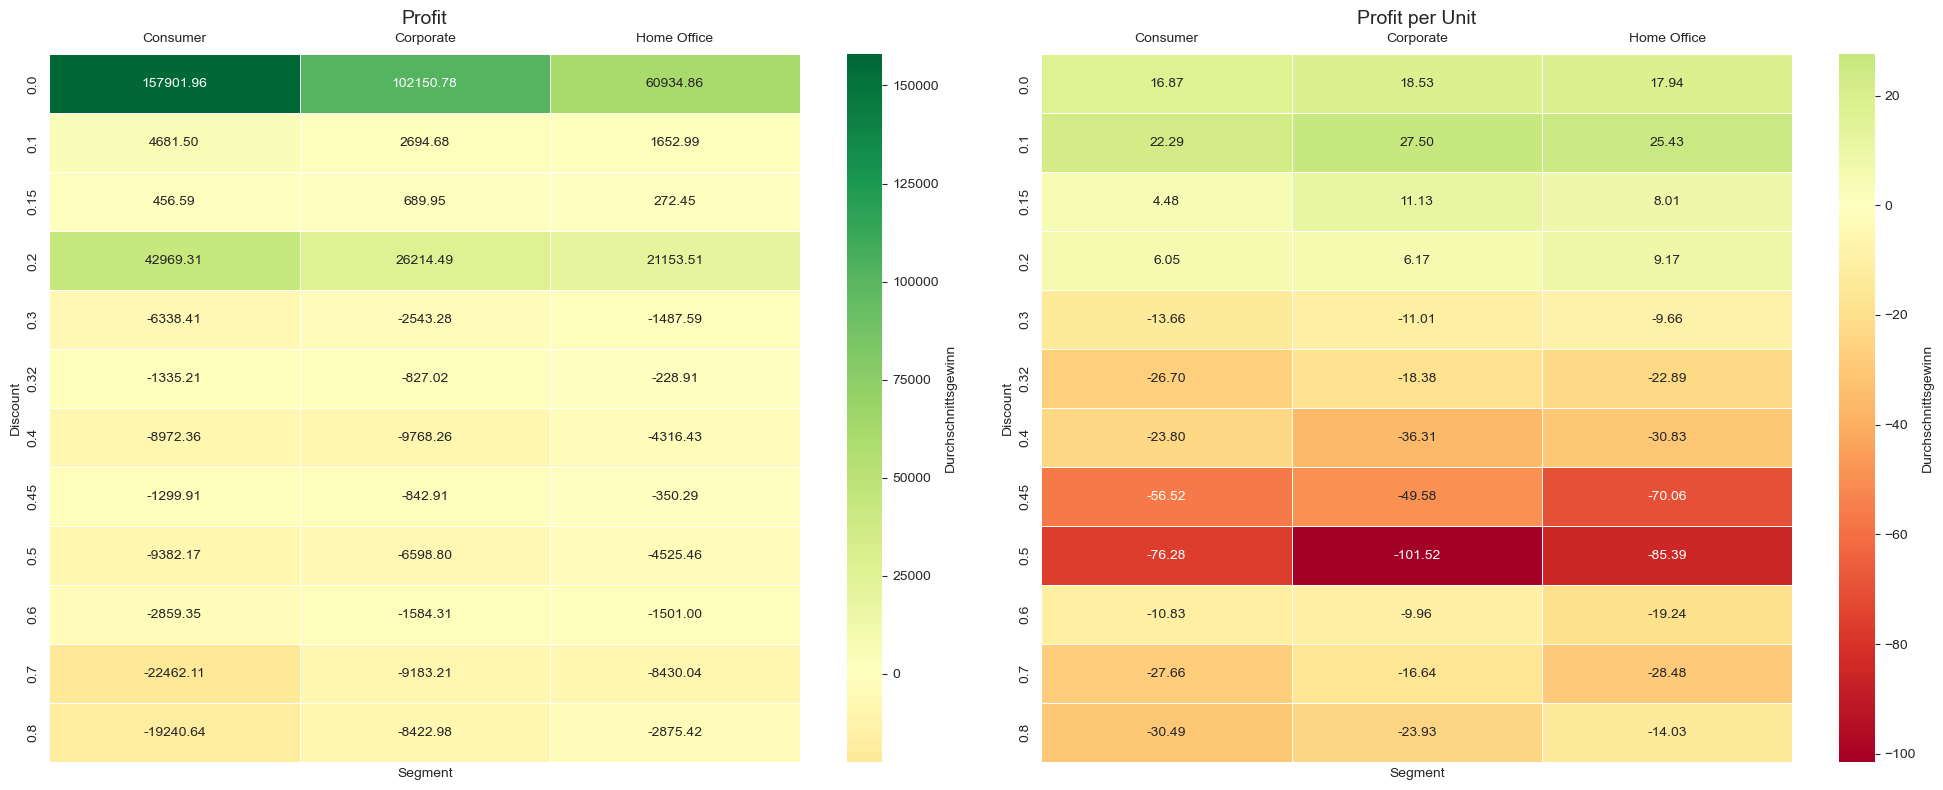

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8)) 
gen_plot(
    df_profit_sum_discount_segment, 
    None, 
    "Profit", 
    "Segment", 
    "Discount", 
    ax=ax1 
)
gen_plot(
    df_profit_sum_discount_segment, 
    df_quantity_sum_discount_segment, 
    "Profit per Unit", 
    "Segment", 
    "Discount", 
    ax=ax2 
)
plt.tight_layout()
plt.show()

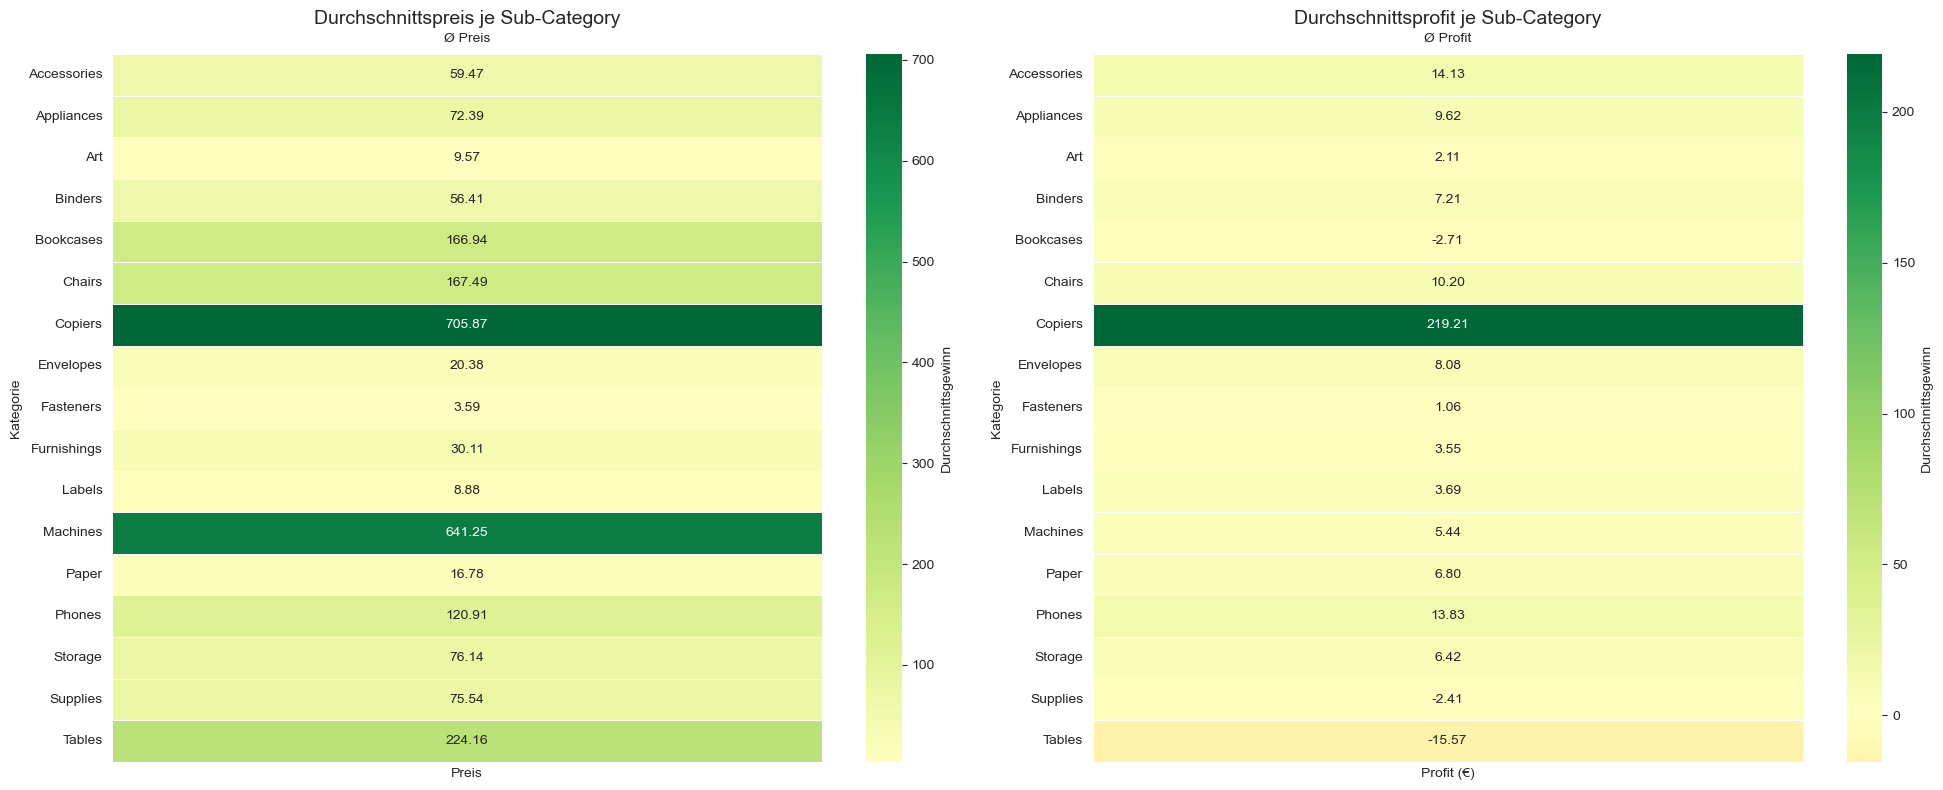

In [ ]:
df_avg_price = df.groupby('sub_category')['original_price_per_unit'].mean().to_frame(name='Ø Preis')
df_avg_profit = df.groupby('sub_category')['profit_per_unit'].mean().to_frame(name='Ø Profit')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

gen_plot(
    df_values=df_avg_price,
    title="Durchschnittspreis je Sub-Category",
    xlabel="Preis",
    ylabel="Kategorie",
    ax=ax1
)

gen_plot(
    df_values=df_avg_profit,
    title="Durchschnittsprofit je Sub-Category",
    xlabel="Profit (€)",
    ylabel="Kategorie",
    ax=ax2
)

plt.tight_layout()
plt.show()

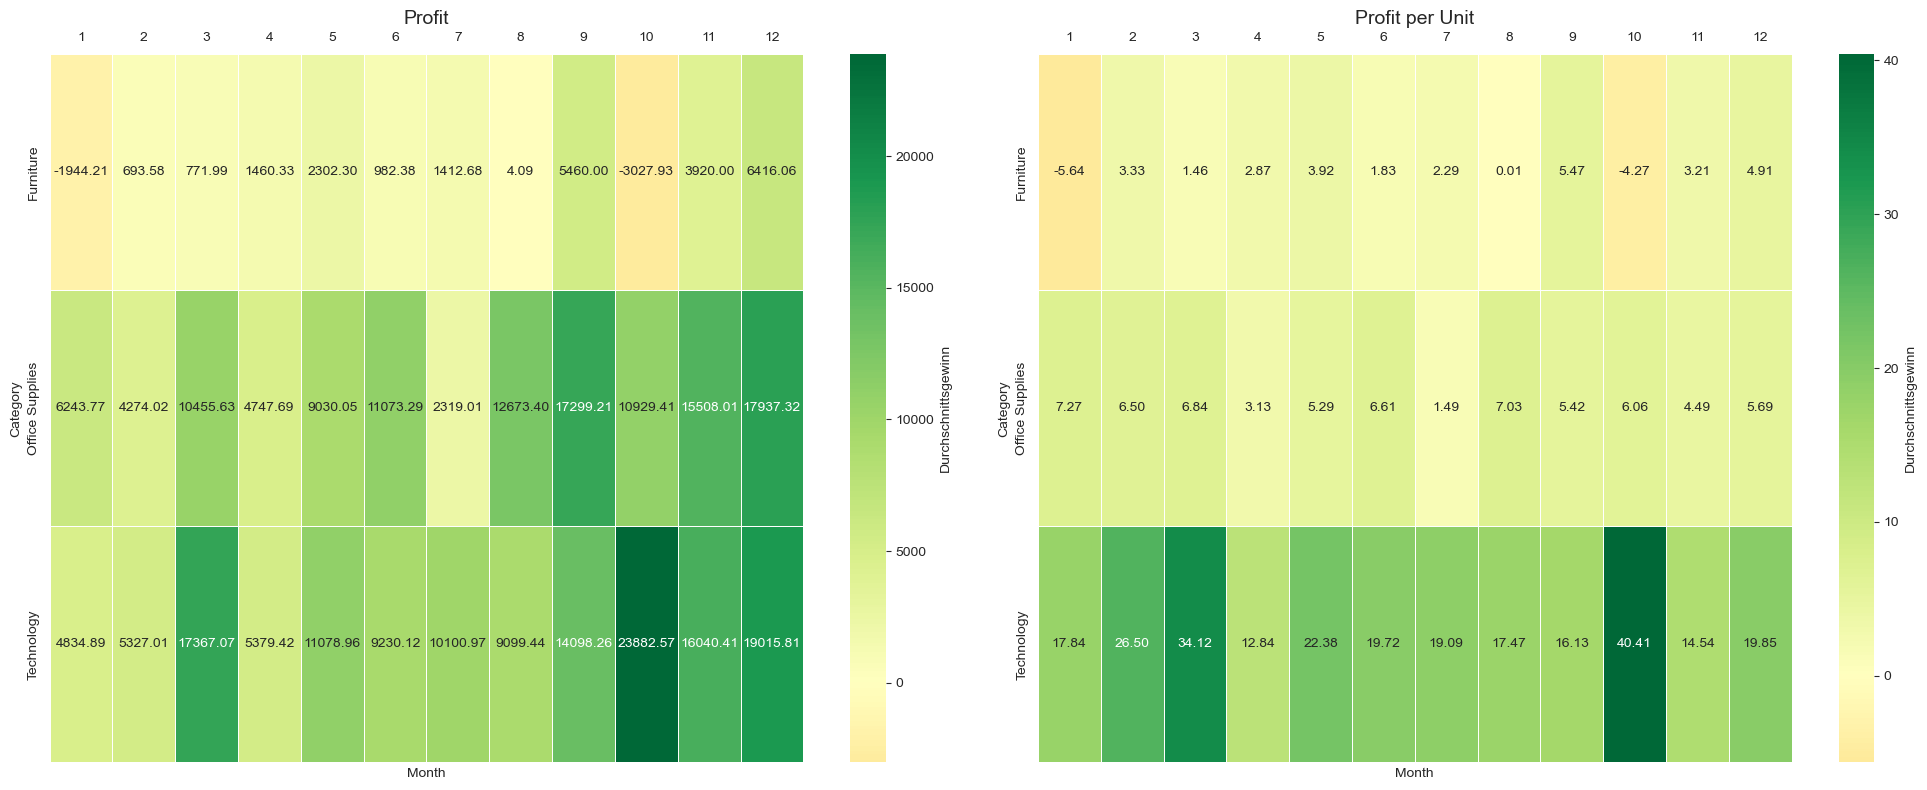

In [114]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8)) 
gen_plot(
    df_profit_sum_category_month, 
    None, 
    "Profit", 
    "Month", 
    "Category", 
    ax=ax1 
)
gen_plot(
    df_profit_sum_category_month, 
    df_quantity_sum_category_month, 
    "Profit per Unit", 
    "Month", 
    "Category", 
    ax=ax2 
)
plt.tight_layout()
plt.show()

## Korrelationen

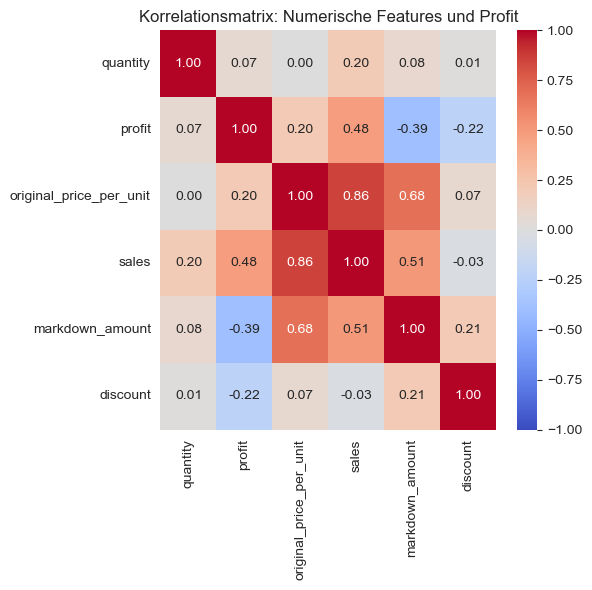

In [ ]:
numerical_features = ['sales', 'quantity', 'discount', 'original_price_per_unit', 'markdown_amount']
columns_to_analyze = list(set(numerical_features + ['profit']))

corr_matrix = df[columns_to_analyze].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(
    corr_matrix, 
    annot=True,       
    cmap='coolwarm',  
    vmin=-1, vmax=1,  
    center=0,        
    fmt=".2f"     
)
plt.title('Korrelationsmatrix: Numerische Features und Profit')
plt.tight_layout()
plt.show()